### 목표
 - 붓꽃의 꽃잎 길이, 너비/ 꽃받침 길이, 너비 특징 4개를 활용하여 3가지의 붓꽃 품종을 분류해보자
  - knn모델의 이웃의 수를 조정해보자 (n_neighbors개수를 조정, k의 개수를 조정, k == n_neighbors : 하이퍼 파라미터 튜닝)

In [1]:
# 필요한 라이브러리 로딩
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 머신러닝 라이브러리
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# train, test set 자동 분리
from sklearn.model_selection import train_test_split

# 데이터 불러오기
from sklearn.datasets import load_iris # 붓꽃데이터 가져오기

In [2]:
# iris 데이터 열어서 확인
iris_data = load_iris()
iris_data
# 딕셔너리 형태로 데이터 담김
# 번치(bunch) 객체 : 파이썬의 딕셔너리와 유사한 머신러닝 전용 데이터 구조

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
# 딕셔너리 key값만 확인
# keys() , values(), items() : 키-값 둘 다 확인
iris_data.keys()
# data : X == 문제 == 독립변수 == 설명변수 == 특성 == feature
# target : y == 답 == 종속변수 == 반응변수 == 라벨 == label 
# feature_names : 특성의 이름
# target_names : 답 데이터의 이름
# DESCR : 기술통계, 데이터 정보(크기, 상관관계, 출처)
# 필수적 입력 데이터 : data, target
# 옵션 데이터 : feature_name, target_names, DESCR, frame, filename ...

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
# 문제데이터 살펴보기
# iris_data['iris']
iris_data.data

# 크기 -> .shape
print(iris_data.data.shape)

# dtype
print(iris_data.data.dtype)
# 모델은 숫자만 인식

# 차원 -> ndim
print(iris_data.data.ndim)

(150, 4)
float64
2


In [8]:
# 특성의 이름 확인
iris_data.feature_names
# ['sepal length (cm)',  : 꽃받침 길이
# 'sepal width (cm)',    : 꽃받침 너비
# 'petal length (cm)',   : 꽃잎 길이
# 'petal width (cm)']    : 꽃잎 너비
# 위의 총 4개의 특성으로 붓꽃 품종을 분류해보자

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
# 답데이터 살펴보기
# 클래스(카테고리)의 개수 : 3개 
iris_data.target
# 1. 섞은 다음 2. 7:3으로 분할 --> train_test_split 라이브러리

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
iris_data.target_names
# setosa : 0 , versicolor : 1, virginica : 2

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
# DESCR : 기술통계량 확인
print(iris_data.DESCR)
# Class Correction 클래스와의 상관관계
# -1 ~ 1로 표현되는 상관계수
# -1과 1에 가까울수록 상관관계가 어느정도 높다
# 0에 가까울수록 상대적으로 상관관계가 덜함
# (high!) : petal width, petal length 이 2개의 컬럼이
# 3가지 품종을 분류하는데 큰 도움을 주고 있다. (유의미한 컬럼이다.)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

#### 데이터셋 구성하기
- numpy -> 특성데이터(feature, 문제)만 df변경
- X, y
- train_test_split 도구를 활용해서 train set, test set으로 구분

In [14]:
# iris_data.feature_names[0] : 'sepal length (cm)'
iris_data.data[:, 0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [17]:
dic = {iris_data.feature_names[0] : iris_data.data[:, 0],
      iris_data.feature_names[1] : iris_data.data[:, 1],
      iris_data.feature_names[2] : iris_data.data[:, 2],
      iris_data.feature_names[3] : iris_data.data[:, 3]}
iris_df = pd.DataFrame(dic)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
# 문제와 답 변수 정리
X = iris_df
y = iris_data.target
np.unique(y, return_counts = True)  # return_counts : 몇 개씩 있는지 알려줌
# 답데이터가 균형을 이루고 있다 -> 다양성이 나름 유지된 데이터

(array([0, 1, 2]), array([50, 50, 50], dtype=int64))

In [179]:
# 훈련세트
# 테스트세트
# train_test_split 도구 활용 -> 랜덤하게 섞고 분리(랜덤 샘플링)
# 7:3 (train : 70%, test : 30%)
# random_state = 5 (랜덤하게 섞는 기준을 고정하는 것)
# 7:3 -> test_size = 0.3 
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size = 0.3,
                                                random_state = 5)
# 4개 변수 크기
print("훈련 데이터셋 크기 : ", X_train.shape, y_train.shape)
print("테스트 데이터셋 크기 : ", X_test.shape, y_test.shape)

훈련 데이터셋 크기 :  (105, 4) (105,)
테스트 데이터셋 크기 :  (45, 4) (45,)


In [180]:
# 데이터의 다양성이 유지되고 있는지 확인
# y_train의 카테고리별 개수 확인 
np.unique(y_train, return_counts = True)[1]
# train_test_split을 사용해서 나름대로 다양성이 유지된 훈련데이터를 만들었다!

array([35, 34, 36], dtype=int64)

### 탐색적 데이터 분석(EDA)
- 산점도 행렬(scatterplot matrix) : 특성 간의 관계를 일목요연하게 보기 위해 사용
- 각 특성을 결합하여 3가지 붓꽃 품종이 잘 분리가 되는 특성이 있는지 확인해보자

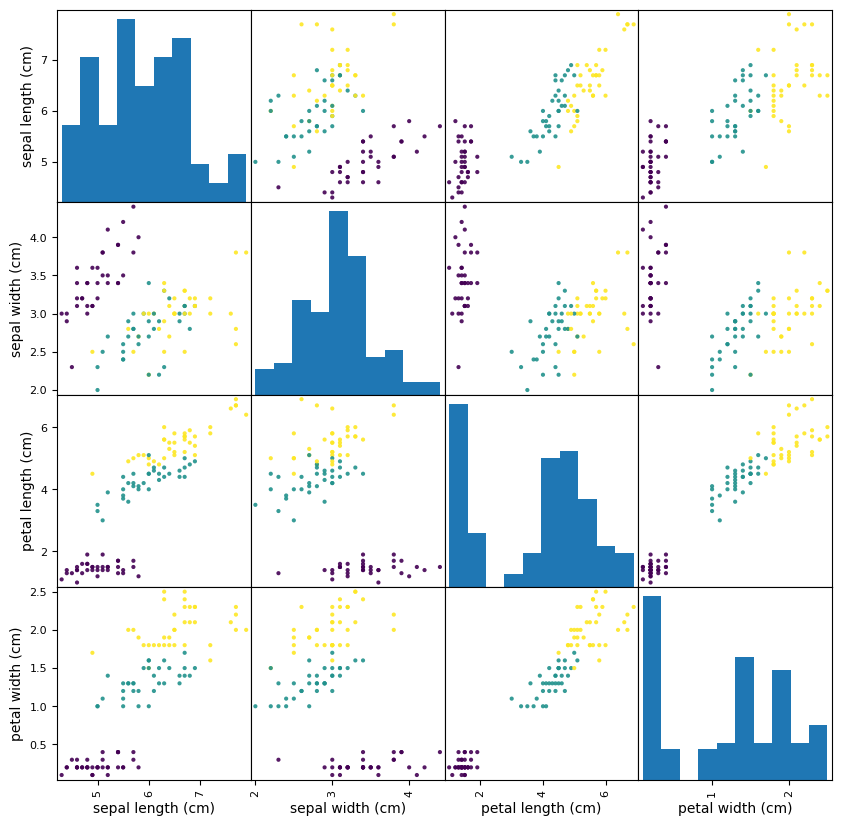

In [181]:
pd.plotting.scatter_matrix(X_train,    # 문제 데이터(좌표)
                          figsize = (10,10),  # 그래프의 크기
                          c = y_train,        # 답 데이터의 색상 설정
                          alpha = 0.9)        # 그래프 산점도 점 투명도
plt.show()
# 같은 색상의 점끼리 뭉쳐 있고, 다른 색상과는 위치적으로 구별이 된다면
# 해당 특성의 결합이 붓꽃 품종을 분류하는데 의미가 있는 것
# 꽃잎의 길이, 너비 특성이 붓꽃 품종을 분류하는데 의미가 있어보임

##### 모델링

In [194]:
# 모델 객체 생성
# 이웃의 수 5
iris_knn_model = KNeighborsClassifier(n_neighbors = 8)

In [195]:
# 모델 학습
iris_knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [196]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [197]:
# 모델 예측
pre = iris_knn_model.predict(X_test)
pre # 답데이터 이름의 인덱스 번호로 사용 
print('- 테스트셋 전체를 이용한 예측 결과 : ', pre)
print('- 예상되는 품종?', iris_data.target_names[pre])

- 테스트셋 전체를 이용한 예측 결과 :  [1 2 2 0 2 1 0 1 0 1 1 2 2 2 0 0 2 2 0 0 1 2 0 1 1 2 1 1 1 2 0 1 1 0 1 0 0
 2 0 2 2 1 0 0 1]
- 예상되는 품종? ['versicolor' 'virginica' 'virginica' 'setosa' 'virginica' 'versicolor'
 'setosa' 'versicolor' 'setosa' 'versicolor' 'versicolor' 'virginica'
 'virginica' 'virginica' 'setosa' 'setosa' 'virginica' 'virginica'
 'setosa' 'setosa' 'versicolor' 'virginica' 'setosa' 'versicolor'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'setosa' 'versicolor' 'versicolor' 'setosa' 'versicolor'
 'setosa' 'setosa' 'virginica' 'setosa' 'virginica' 'virginica'
 'versicolor' 'setosa' 'setosa' 'versicolor']


In [198]:
# 정확도 측정
# k = 5 (이웃의 수 : 5개) -> 95.6%
accuracy_score(y_test, pre) * 100 

100.0

In [199]:
iris_knn_model.score(X_test, y_test)

1.0

#### 하이퍼 파라미터 조정(튜닝)
- knn에서 이웃의 수(k, n_neighbors)값을 하이퍼파라미터라고 한다.
- 반복문을 돌리면서 k값을 바꾸고 해당 시점의 train, test를 빈 리스트에 저장
- 그 후 선그래프로 복잡도 곡선을 그려보자

In [200]:
X_train.shape

(105, 4)

In [202]:
# 1 ~ train 행 개수만큼 k값을 설정이 가능
# 1 ~ 50 k 범위 설정
# train, test 정확도를 담을 빈 리스트
train_acc_lst = []
test_acc_lst = []
for i in range(1,51) :
    # knn 모델 생성
    model = KNeighborsClassifier(n_neighbors = i)
    # knn 모델 학습 (X_train)
    model.fit(X_train, y_train)
    
    # knn 모델 예측
    X_train_pre = model.predict(X_train)
    X_test_pre = model.predict(X_test)
    
    # knn 모델 정확도 
    X_train_acc = accuracy_score(y_train, X_train_pre)
    X_test_acc = accuracy_score(y_test, X_test_pre)
    
    # 빈리스트에 추가하기
    train_acc_lst.append(X_train_acc)
    test_acc_lst.append(X_test_acc)

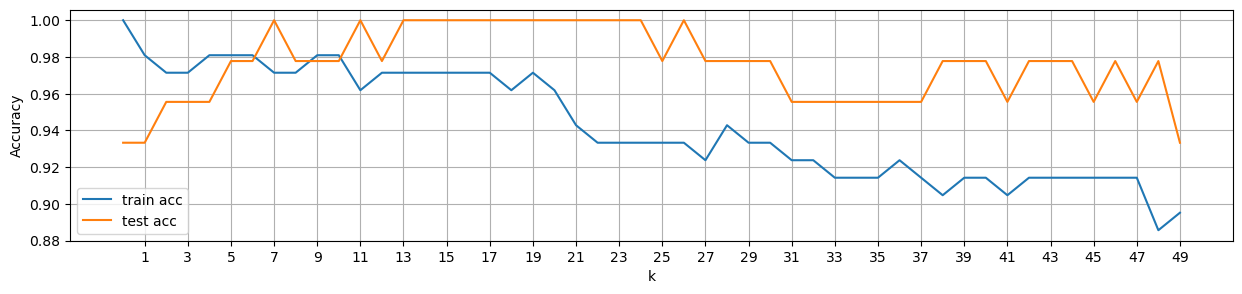

In [203]:
# 선그래프
# matplotlib
plt.figure(figsize=(15,3))
plt.plot(train_acc_lst, label = 'train acc')
plt.plot(test_acc_lst, label = 'test acc')
plt.legend()  # 범례
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(range(1, 50, 2))   # x축 격자눈금 설정
plt.grid()
plt.show()
# 파란색 선 --> train 정확도 
# 주황색 선 --> test 정확도
# 과대적합은 test 예측을 잘 못함, 과소적합은 train, test 둘 다 못함
# k값이 커질수록 과소적합 현상으로 가고 있음 (이웃의 수가 많아지면 과반수에 따라가게 됨)
# 모델의 하이퍼 파라미터를 변경할 필요 X
# k값이 6인 지점이 test와 train 데이터의 정확도가 같이 높으므로 적당한 파라미터 값이다.
# 작은 양의 데이터로 일반화를 하기 위해서 여러 번의 검증 방법이 필요!